In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dataset_name = 'housing.data'
dataset_columns = ['CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BRATIO', 'LSTAT', 'MEDV']

dataset = pd.read_csv('housing.data', 
                      delim_whitespace=True, 
                      header=None, 
                      names=dataset_columns)

dataset['TARGET'] = np.newaxis

In [4]:
dataset

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,None
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,None
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,None
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,None
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,None
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,None
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,None
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,None


,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,None
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,None
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,None
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,None
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,None
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,None
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,None
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,None


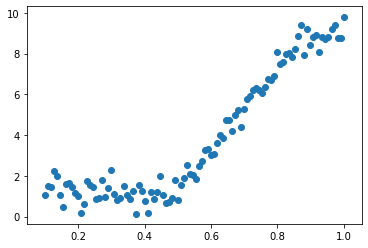

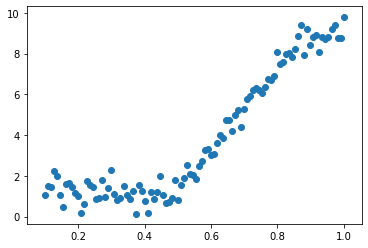

In [5]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)


plt.scatter(data_x, data_y)

In [6]:
data_x = np.hstack((np.ones_like(data_x), data_x))

In [7]:
order = np.random.permutation(len(data_x))
portion = 20

test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

In [8]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

In [9]:
w = np.random.randn(2)
alpha = 0.1
tolerance = 0.0000001

iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    
    new_w = w - alpha * gradient
    
    if np.sum(abs(new_w -w)) < tolerance:
        break
        
        
    iterations += 1
    w = new_w

print(w)

[-1.95532763 10.7616576 ]
[-1.95532763 10.7616576 ]


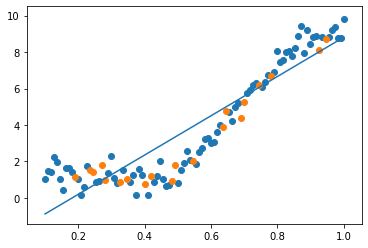

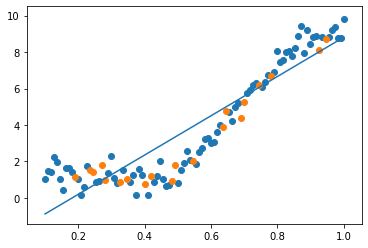

In [10]:
plt.plot(data_x[:, 1], data_x.dot(w))

plt.scatter(train_x[:, 1], train_y)

plt.scatter(test_x[:, 1], test_y)

plt.show()

In [155]:
class OLS:
    """
    Class, which implements gradient descent with the 
    
    """

    def __init__(self, iterations = 10, tolerance = 1, learning_rate = 0.001):
        self.iterations = iterations
        self.tolerance = tolerance
        self.learning_rate = learning_rate
        self.slopes = []
        self.slopes_records = []
        self.cost_records = []
        
    def fit(self, features: np.array, target: np.array):
        """
        Prepare data for the fit:
        
        0. Validate the correct shapes of the features and targets. 
           The shape of the features is (n, k), where the shape of the target is (n, 1) and skip rows
           with missing values.
        
        1. Add column on the zero index with all ones to the features. The reason is to get rid of bias,
           as each bias can be converted to the feature. For example,
           
           y = b + slope1 * f1 + slope2 * f2 ... = slope0 * 1 + slope1 * f1 + slope2 * f2... 
        
        2. Setup random slopes vector of shape (k + 1)
        
        3. Invalidate records
        
        """
        # Add zero column to the features
        features_copy = np.ones((features.shape[0], features.shape[1] + 1))
        # TODO: Get rid of copying
        features_copy[:, 1:] = features.copy()
        
        self.slopes = np.random.randint((features_copy.shape[1], 1))
        
        print(self.slopes, features_copy.shape)
        
        self.slopes_records = []
        
        self.cost_records = []
        
        self.__gradient_descent(features_copy, target)
        
    def predict(self, features: np.array):
        """
        Predict value
        """
        return features.dot(self.slopes)
        
    def __mse_cost(self, features: np.array, target: np.array):
        """
        Calculates mean square error between feature and target.
        
        Input:
            slopes: -  np.array, vector of caclulated slopes
            features: - np.array, a row of the feature matrix
            target: - np.array, the target
          
        Math equasion:
            MSE = (1/n) * sum((prediction - target)^2)
        """
        
        preditions = predict(features)
        
        return np.square(predictions - target).mean()
        
    def __gradient_descent_iteration(self, features: np.array, target: np.array):
        """
        Calculates gradient descent for the features and target.
        
        Input:
            slopes: - np.array, vector of slopes (share: (k, 1), where k is number of feature columns)
            features: - np.array, matrix of features (shape: (n, m))
            targets: - np.array, matrix of targets (shape: (n, 1))
            
        Algorithm:
            Variables:
                * iterations: - maximum number of the iterations
                * tolerance: - the stop value of the GD
                * learning_rate - the step size of the function
            
            Steps:
                1. Slopes are choosen randomly at the iteration 0. 
                   Then they are calculated for each feature attribute.
                   
                   The formula of the descent is the next:
                   
                   gradient_slope = (2/n) / sum(prediction - target) (derivation of the loss/cost function)
                
                2. After acquiring gradient_slope update slopes with paying attention to the learning weight.
                
                   slopes -= learning_rate * gradient_slope
        """
        
        predictions = predict(features)
         
        gradient_slopes = 2 * features.T.dot(predictions - target).mean()
        
        self.slopes -= self.learning_rate * gradient_slopes
        
        
    def __gradient_descent(self, features: np.array, target: np.array):
        """
        Perform gradient descent for n iterations.
        """
        for iteration in range(self.iterations):
            
            prediction = features.dot(self.slopes)
            
            self.__gradient_descent_iteration(self.slopes, features, target)        



In [95]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)


def __mse_cost(slopes, feature: np.array, target: np.array):
    predictions = feature.dot(slopes)
    
    m = len(target) 
    
    print(predictions.shape, target.shape)
        
    print(np.square(predictions - target).mean())
        
    return 1/m * np.sum(np.square(predictions - target))



slopes = np.zeros(1).T

__mse_cost(slopes, data_x[1], data_y)


() (100, 1)
25.312827229198582
() (100, 1)
25.312827229198582


25.312827229198582

25.312827229198582

In [31]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis] + [1,  1]
data_x[2, :]



TypeError: dot() missing required argument 'b' (pos 1)

TypeError: dot() missing required argument 'b' (pos 1)

In [148]:
features = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 6]])


features_copy = np.zeros((features.shape[0], features.shape[1] + 1))
        
features_copy[:, 1:] = features

print(features_copy)

[[0. 1. 2. 3.]
 [0. 2. 3. 4.]
 [0. 3. 4. 6.]]
[[0. 1. 2. 3.]
 [0. 2. 3. 4.]
 [0. 3. 4. 6.]]


In [156]:
model = OLS(100, 1, 0.1)

In [157]:
dataset_name = 'housing.data'
dataset_columns = ['CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BRATIO', 'LSTAT', 'MEDV']

dataset = pd.read_csv('housing.data', 
                      delim_whitespace=True, 
                      header=None, 
                      names=dataset_columns)

dataset['TARGET'] = 1

In [158]:
model.fit(dataset[['CR', 'ZN']], dataset['RAD'])


[1 0] (506, 3)
[1 0] (506, 3)


ValueError: shapes (506,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

ValueError: shapes (506,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [135]:
np.array(dataset[['CR', 'ZN']])

array([[6.3200e-03, 1.8000e+01],
       [2.7310e-02, 0.0000e+00],
       [2.7290e-02, 0.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00],
       [1.0959e-01, 0.0000e+00],
       [4.7410e-02, 0.0000e+00]])

array([[6.3200e-03, 1.8000e+01],
       [2.7310e-02, 0.0000e+00],
       [2.7290e-02, 0.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00],
       [1.0959e-01, 0.0000e+00],
       [4.7410e-02, 0.0000e+00]])

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV,TARGET
CR,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,NaN
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,NaN
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,NaN
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,NaN
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,NaN
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,NaN
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,NaN
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,NaN
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,NaN
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,NaN


,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV,TARGET
CR,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,NaN
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,NaN
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,NaN
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,NaN
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,NaN
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,NaN
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,NaN
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,NaN
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,NaN
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,NaN
